In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint, TensorBoard  # Add TensorBoard here
import matplotlib.pyplot as plt
import datetime
from glob import glob
from PIL import Image
from fileinput import filename
import os
import random
import shutil

In [3]:
# Menentukan folder untuk menyimpan log TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Membuat callback TensorBoard
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

#Set Up parameter

In [4]:
imgWidth = 256
imgHeight = 256
batchSize = 32
numOfEpochs = 50

TRAINING_DIR = "D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/train"

NumOfClasses = len(glob('D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/train/*')) # dont forget the '  /*  '
print (NumOfClasses) # 6 classes

6


#Data Augmetation

In [5]:
# data augmentation to increase the train data

train_datagen = ImageDataGenerator(rescale = 1/255.0, #normalize between 0 - 1
                                    rotation_range = 30 ,
                                    zoom_range = 0.4 ,
                                    horizontal_flip=True,
                                    shear_range=0.4)


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = batchSize,
                                                    class_mode = 'categorical',
                                                    target_size = (imgHeight,imgWidth))




Found 464 images belonging to 6 classes.


In [6]:
validation_DIR = "D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/validation"
val_datagen = ImageDataGenerator(rescale = 1/255.0)

val_generator = val_datagen.flow_from_directory(validation_DIR,
                                                batch_size = batchSize,
                                                class_mode='categorical',
                                                target_size = (imgHeight, imgWidth))

Found 87 images belonging to 6 classes.


In [7]:
callBack = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# if we will find a better model we will save it here :
bestModelFileName = "D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/chess_bestmodel.h5"
bestModel = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)






Membuat Model


In [8]:
# the model :

model = Sequential([ 
    Conv2D(32, (3,3) , activation='relu' , input_shape=(imgHeight, imgWidth, 3) ) ,
    MaxPooling2D(2,2),
    
    Conv2D(64 , (3,3) , activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64 , (3,3) , activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128 , (3,3) , activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256 , (3,3) , activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512 , activation='relu'),
    Dense(512 , activation='relu'),

    Dense(NumOfClasses , activation='softmax') # softmax -> 0 to 1 
])

print (model.summary() )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

compile & training model


In [9]:
from PIL import Image


In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs = numOfEpochs,
                    verbose=1,
                    validation_data = val_generator,
                    callbacks = [bestModel, callBack, tensorboard])  # Add tensorboard here

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 1.8166 - accuracy: 0.1832
Epoch 1: val_accuracy improved from -inf to 0.19540, saving model to D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset\chess_bestmodel.h5


c:\Users\Asus\anaconda3\envs\env-logistic-py38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 25s 2s/step - loss: 1.8166 - accuracy: 0.1832 - val_loss: 1.7846 - val_accuracy: 0.1954
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.7834 - accuracy: 0.1853
Epoch 2: val_accuracy improved from 0.19540 to 0.20690, saving model to D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset\chess_bestmodel.h5
15/15 [==============================] - 22s 1s/step - loss: 1.7834 - accuracy: 0.1853 - val_loss: 1.7818 - val_accuracy: 0.2069
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 1.7842 - accuracy: 0.1724
Epoch 3: val_accuracy improved from 0.20690 to 0.21839, saving model to D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset\chess_bestmodel.h5
15/15 [==============================] - 22s 1s/step - loss: 1.7842 - accuracy: 0.1724 - val_loss: 1.7701 - val_accuracy: 0.2184
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 1.7756 - accuracy: 0.2047
Epoch 4: val_ac

Display result

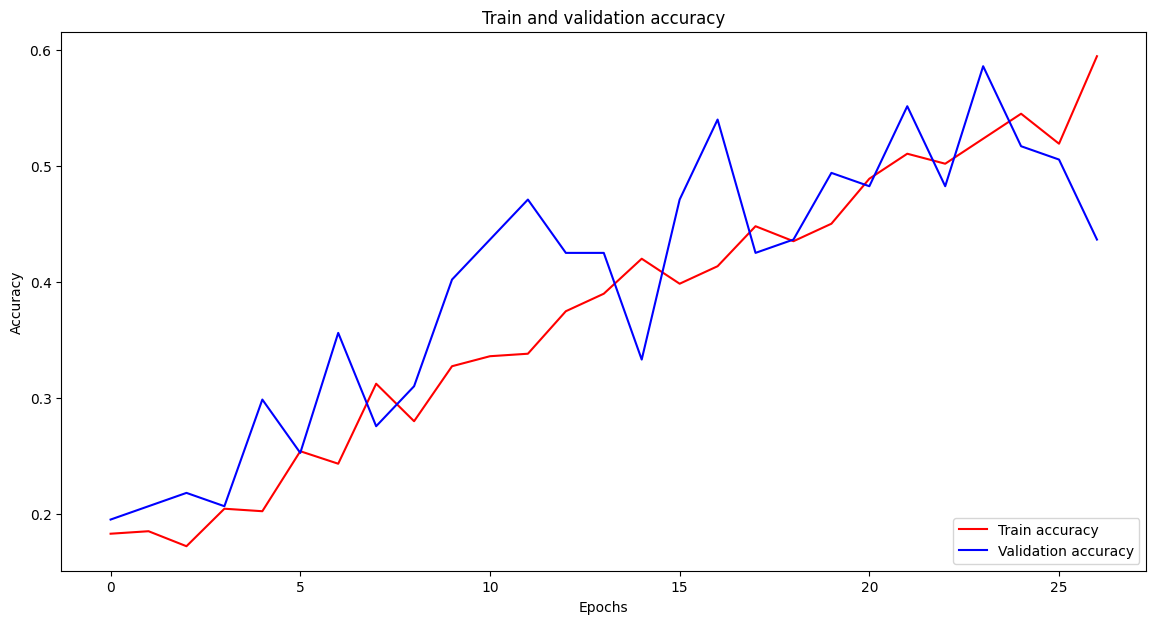

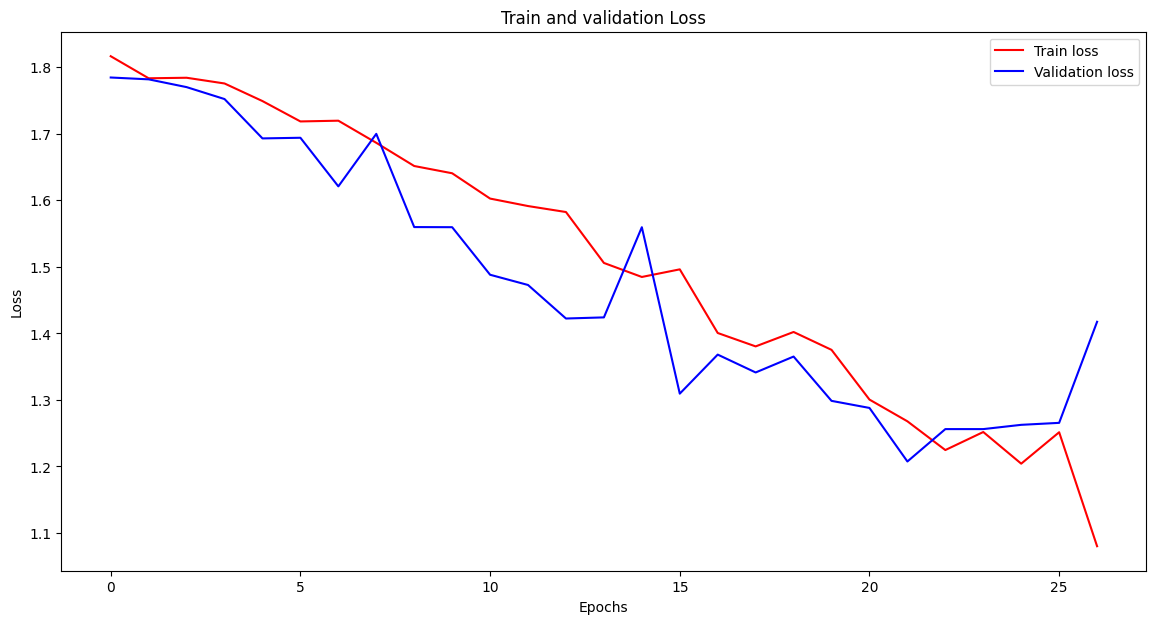

In [11]:
# display the result using pyplot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # for the max value in the diagram


# accuracy chart

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc , 'r', label="Train accuracy")
plt.plot(epochs, val_acc , 'b', label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and validation accuracy')
plt.legend(loc='lower right')
plt.show()

#loss chart
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss , 'r', label="Train loss")
plt.plot(epochs, val_loss , 'b', label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and validation Loss')
plt.legend(loc='upper right')
plt.show()



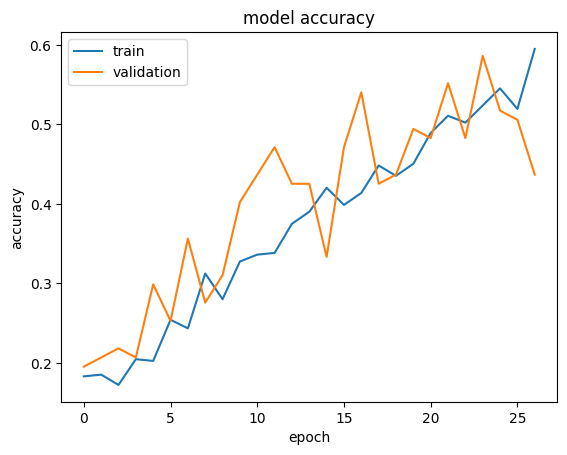

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# save img of plot
fig.savefig('D:\\kuliah\\Semester 5\\artificial inteligence\\Tugas-2-Kecerdasan-Artifisial-.2108107010033\\accuracy1.png')



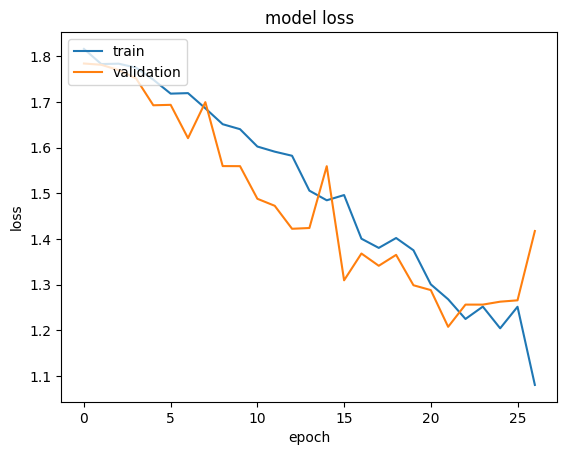

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# save img of plot
fig.savefig('D:\\kuliah\\Semester 5\\artificial inteligence\\Tugas-2-Kecerdasan-Artifisial-.2108107010033\\loss1.png')

In [21]:
# Mencetak jumlah fitur pada setiap lapisan konvolusi
for layer in model.layers:
    if isinstance(layer, Conv2D):
        print(f"Jumlah fitur pada {layer.name}: {layer.output_shape[3]}")

# Mencetak jumlah bobot pada setiap lapisan
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print(f"Jumlah bobot pada {layer.name}: {len(weights[0].flatten())}")

# Mencetak jumlah total bobot pada seluruh model
total_weights = sum([len(layer.get_weights()[0].flatten()) for layer in model.layers if layer.get_weights()])
print(f"Jumlah total bobot pada model: {total_weights}")

Jumlah fitur pada conv2d: 32
Jumlah fitur pada conv2d_1: 64
Jumlah fitur pada conv2d_2: 64
Jumlah fitur pada conv2d_3: 128
Jumlah fitur pada conv2d_4: 256
Jumlah bobot pada conv2d: 864
Jumlah bobot pada conv2d_1: 18432
Jumlah bobot pada conv2d_2: 36864
Jumlah bobot pada conv2d_3: 73728
Jumlah bobot pada conv2d_4: 294912
Jumlah bobot pada dense: 4718592
Jumlah bobot pada dense_1: 262144
Jumlah bobot pada dense_2: 3072
Jumlah total bobot pada model: 5408608


In [27]:
# model summary
# model.summary()

# mencetak hideen layer
# for layer in model.layers:
    # print(layer.name, layer.output_shape)
    
# mencetak hidden node per layer 
for layer in model.layers:
    if 'dense' in layer.name:
        print(f"{layer.name} has {layer.units} nodes")

# memcetak weight dan bias
# for layer in model.layers:
    # if 'dense' in layer.name:
        # print(f"{layer.name} has {layer.get_weights()[0].shape[0]} weights and {layer.get_weights()[1].shape[0]} biases")

# mencetak  total weight dari model
# print("Total weights: ", model.count_params())


dense has 512 nodes
dense_1 has 512 nodes
dense_2 has 6 nodes


tes model

(1, 256, 256, 3)
1/1 [==============================] - 0s 85ms/step
0
Predicted : Bishop


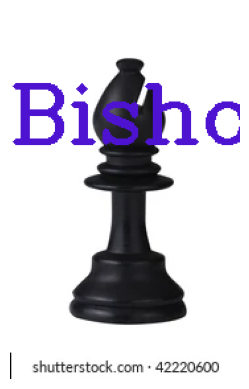

In [2]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

imgWidth = 256
imgHeight = 256

# the names of the classes should be sorted 
classes = ["Bishop","King","Knight", "Pawn","Queen","Rook"]


#lets load the model 

model = load_model("D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/chess_best_model.h5")

#print(model.summary() )


# lets build a function for preparing an image for model

def prepareImage(pathToImage) :
    image = load_img(pathToImage , target_size=(imgHeight, imgWidth))
    imgResult = img_to_array(image)
    imgResult = np.expand_dims(imgResult , axis=0 )
    imgResult = imgResult / 255.
    return imgResult


#testImagePath = "D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/test/knight.jpeg"
# testImagePath = "D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/test/rook.jpg"
testImagePath = "D:/kuliah/Semester 5/artificial inteligence/Chessman-image-dataset/test/bishop.jpg"



# run the function
imageForModel = prepareImage(testImagePath)

print(imageForModel.shape)

#predict the image
resultArray = model.predict(imageForModel , batch_size=32 , verbose=1)
answer = np.argmax(resultArray , axis=1 )

print(answer[0])

text = classes[answer[0]]
print ('Predicted : '+ text)

# load the image using OpenCV
img = cv2.imread(testImagePath)
font = cv2.FONT_HERSHEY_COMPLEX

# put the predicted text on the image
cv2.putText(img, text, (0, 100), font, 2, (209, 19, 77), 3)

# convert BGR image to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [18]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [19]:


# Run TensorBoard

%load_ext tensorboard
%tensorboard --logdir=./logs



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 24244), started 1:06:44 ago. (Use '!kill 24244' to kill it.)

In [20]:
!tensorboard dev upload --logdir "d:/kuliah/Semester 5/artificial inteligence/Tugas-2-Kecerdasan-Artifisial-.2108107010033"
